The purpose of this file is to analyze the .txt files exported by the ATEX software

I want to plot my data in a way that is comparable to how Ernould chapter 4 plots his database

Plots 

When disorientation angle is varied: 
- Fig 2a - Max and Min error of von mises strain versus disorientation 
- Fig 9a  - Max relative error versus disortination, plotted for each of the von mises strain values as a line plot 
- Fig 9c - Relative error versus disorientation for each of the components as a scatter plot 


When strain is varied: 
- Fig 2b - Max and Min error of disorientation angle versus strain 
- Fig 9b - see above 

###  Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import conversions
import os
import ErnouldsMethod

Before you can read in the file make sure that the line DATA BEGIN is commented

# Inputs

In [2]:
#EMEBSD version 
#file that contains all of the deformation gradient data exported from Al_results visulalization
filename = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/results/w3_Dec142025_npyfiles/w3_homographies_Dec142025.npy'

strain = False #set to True for strain version, False for w version

# ----------- Code for reading in the inputted values ------------
Testcasesfilename = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/Inputs/CSV files/Altering_w3.csv'
Rows = 6
Columns = 58

componentname = 'w3'
foldername = f'/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/results/Dec22/{componentname}_results/'

os.makedirs(foldername, exist_ok=True)

In [3]:
h = np.load(
        filename
    )

#h is in column major order convert h to row major order for comparison
h11 = h[:, 0]
h12 = h[:, 1]
h13 = h[:, 2]
h21 = h[:, 3]
h22 = h[:, 4]
h23 = h[:, 5]
h31 = h[:, 6]
h32 = h[:, 7]

#restack h in row major order
h_calc = np.stack((h11, h12, h13, h21, h22, h23, h31, h32), axis=1)


F = conversions.h2F(h_calc, np.array([0, 0, 800]))

#pring F shape
print(F.shape)
epsilon, omega = conversions.F2strain(F)



(348, 3, 3)


This is the code to read in a .csv file generated by pyHREBSD

In [4]:

e11 = epsilon[:, 0, 0]
e12 = epsilon[:, 0, 1]
e13 = epsilon[:, 0, 2]
e22 = epsilon[:, 1, 1]
e23 = epsilon[:, 1, 2]
e33 = epsilon[:, 2, 2]
w13 = omega[:, 0, 2]
w21 = omega[:, 1, 0]
w32 = omega[:, 2, 1]


In [5]:
#convert the rotation components to degrees
w13 = np.degrees(w13)
w21 = np.degrees(w21)
w32 = np.degrees(w32)

print(w21)


[ 0.00000000e+00  1.00000235e-01  1.20000108e-01  1.30000240e-01
  1.40000088e-01  1.50000079e-01  1.60000162e-01  1.70000106e-01
  1.80000220e-01  1.90000296e-01  2.00000378e-01  2.20000456e-01
  2.40000266e-01  2.59999954e-01  2.79999740e-01  2.99999916e-01
  3.30000359e-01  3.70000372e-01  4.00000025e-01  4.50000200e-01
  5.00000441e-01  5.99999993e-01  7.00000167e-01  7.99999819e-01
  9.00000769e-01  1.00000043e+00  1.10000019e+00  1.20000030e+00
  1.30000025e+00  1.40000033e+00  1.50000044e+00  1.60000042e+00
  1.70000010e+00  1.79999949e+00  1.89999987e+00  2.00000047e+00
  2.20000022e+00  2.39999997e+00  2.59999984e+00  2.79999949e+00
  3.00000093e+00  3.29619694e+00  3.06624820e+00  2.52955965e+00
  1.98199883e+00  1.57811616e+00  1.13743794e+00  4.89390808e-01
  2.17733176e-01  3.76980489e-01  2.30767051e-01  2.24241743e-01
  2.14781208e-01  1.13436346e-01  1.38909051e-01  1.11374935e-01
  1.89214250e-01  2.57312272e-01  4.38117599e-07  9.99997883e-02
  1.19999753e-01  1.29999

In [6]:
#save the strain and rotation components to a csv file using numpy.savetxt
np.stack((e11, e12, e13, e22, e23, e33, w32, w13, w21), axis=1)
outputfilename = os.path.join(foldername, f'{componentname}_HREBSD_results.csv')
np.savetxt(outputfilename, np.stack((e11, e12, e13, e22, e23, e33, w32, w13, w21), axis=1), delimiter=',', header='e11,e12,e13,e22,e23,e33,w32,w13,w21', comments='')

In [7]:

testcases_data = np.genfromtxt(Testcasesfilename, delimiter=',', encoding='utf-8-sig')
            #breaking the testcases data into euler angles and strain/rotation components
        
w_true = testcases_data[:, 0:3]
e_true = testcases_data[:, 3:]

#print the shape of e
print(e_true.shape)




(348, 9)


In [8]:
e11_true = e_true[:, 0]
e12_true = e_true[:, 1]
e13_true = e_true[:, 2]
e22_true = e_true[:, 4]
e23_true = e_true[:, 5]
e33_true = e_true[:, 8]
#print the first 5 rows of w 
w32_true = w_true[:, 0]
w13_true = w_true[:, 1]
w21_true = w_true[:, 2]

Now we find the error 

In [9]:
#now I need to plot the errors where the x axis is the angle of rotation 


if strain: 
    x_axis = np.array([0, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
0.0009, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.002, 0.0022, 0.0024, 0.0026,
0.0028, 0.003, 0.0032, 0.0034, 0.0036, 0.0038, 0.004, 0.0042, 0.0044, 0.0046, 0.0048, 0.005,
0.00525, 0.0055, 0.00575, 0.006, 0.00625, 0.0065, 0.00675, 0.007, 0.00725, 0.0075, 0.00775,
0.008, 0.00825, 0.0085, 0.00875, 0.009, 0.0095, 0.01, 0.0125, 0.015, 0.0175, 0.02,
0.025, 0.03, 0.035, 0.04, 0.045, 0.05])
else:
    x_axis = np.array([0.0, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.22,
0.24, 0.26, 0.28, 0.3, 0.33, 0.37, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.4, 2.6, 2.8,
3, 3.3, 3.7, 4, 4.5, 5, 6, 7, 8, 9, 10, 10.3, 10.7, 11, 11.5, 12, 13, 14,])


Code for plotting the Von Mises Strain Plots versus disorientation angle

To compare the Relative Error

In [10]:
e11_abs_error = np.abs(e11 - e11_true)
e11_abs_error = e11_abs_error.reshape(Rows, Columns)

e12_abs_error = np.abs(e12 - e12_true)
e12_abs_error = e12_abs_error.reshape(Rows, Columns)

e13_abs_error = np.abs(e13 - e13_true)
e13_abs_error = e13_abs_error.reshape(Rows, Columns)

e22_abs_error = np.abs(e22 - e22_true)
e22_abs_error = e22_abs_error.reshape(Rows, Columns)

e23_abs_error = np.abs(e23 - e23_true)
e23_abs_error = e23_abs_error.reshape(Rows, Columns)

w13_abs_error = np.abs(w13 - w13_true)
w13_abs_error = w13_abs_error.reshape(Rows, Columns)

w21_abs_error = np.abs(w21 - w21_true)
w21_abs_error = w21_abs_error.reshape(Rows, Columns)

w32_abs_error = np.abs(w32 - w32_true)
w32_abs_error = w32_abs_error.reshape(Rows, Columns)


Code for Figure 9c

In [11]:
#find the relative error 

e11 = e11.reshape(Rows, Columns)
e11 = e11[1:, :]
e11_true = e11_true.reshape(Rows, Columns)
e11_true = e11_true[1:, :]

#if none of the e11_true values are zero, then we can calculate the relative error normally
if np.all(e11_true != 0):
    e11_relative_error = np.abs((e11 - e11_true) / e11_true)*100
else:
    e11_relative_error = np.zeros(e11_true.shape)


#do the same for all the components
e12 = e12.reshape(Rows, Columns)
e12 = e12[1:, :]
e12_true = e12_true.reshape(Rows, Columns)
e12_true = e12_true[1:, :]

if np.all(e12_true != 0):
    e12_relative_error = np.abs((e12 - e12_true) / e12_true)*100
else:
    e12_relative_error = np.zeros(e12_true.shape)


e13 = e13.reshape(Rows, Columns)
e13 = e13[1:, :]
e13_true = e13_true.reshape(Rows, Columns)
e13_true = e13_true[1:, :]

if np.all(e13_true != 0):
    e13_relative_error = np.abs((e13 - e13_true) / e13_true)*100
else:
    e13_relative_error = np.zeros(e13_true.shape)



e22 = e22.reshape(Rows, Columns)
e22 = e22[1:, :]
e22_true = e22_true.reshape(Rows, Columns)
e22_true = e22_true[1:, :]

if np.all(e22_true != 0):
    e22_relative_error = np.abs((e22 - e22_true) / e22_true)*100
else:
    e22_relative_error = np.zeros(e22_true.shape)


e23 = e23.reshape(Rows, Columns)
e23 = e23[1:, :]
e23_true = e23_true.reshape(Rows, Columns)
e23_true = e23_true[1:, :]

if np.all(e23_true != 0):
    e23_relative_error = np.abs((e23 - e23_true) / e23_true)*100
else:
    e23_relative_error = np.zeros(e23_true.shape)


w13 = w13.reshape(Rows, Columns)
w13 = w13[1:, :]
w13_true = w13_true.reshape(Rows, Columns)
w13_true = w13_true[1:, :]

if np.all(w13_true != 0):
    w13_relative_error = np.abs((w13 - w13_true) / w13_true)*100
else:
    w13_relative_error = np.zeros(w13_true.shape)


w21 = w21.reshape(Rows, Columns)
w21 = w21[1:, :]
w21_true = w21_true.reshape(Rows, Columns)
w21_true = w21_true[1:, :]

if np.all(w21_true != 0):
    w21_relative_error = np.abs((w21 - w21_true) / w21_true)*100
else:
    w21_relative_error = np.zeros(w21_true.shape)


w32 = w32.reshape(Rows, Columns)
w32 = w32[1:, :]
w32_true = w32_true.reshape(Rows, Columns)
w32_true = w32_true[1:, :]

if np.all(w32_true != 0):
    w32_relative_error = np.abs((w32 - w32_true) / w32_true)*100
else:
    w32_relative_error = np.zeros(w32_true.shape)





# Relative Error 


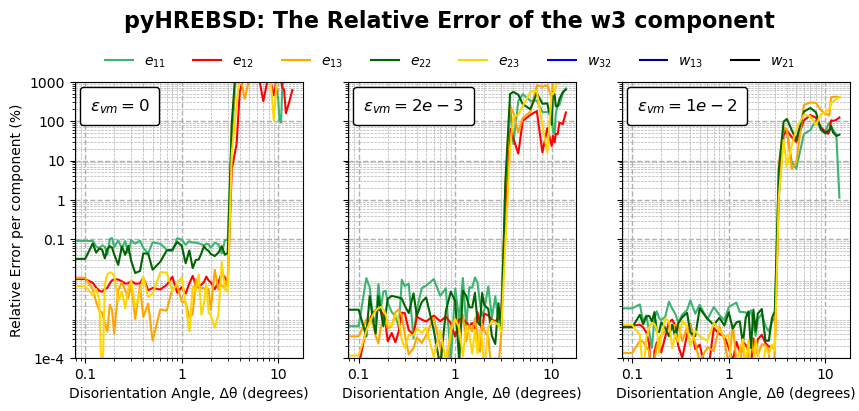

In [12]:

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'blue',
    'w13': 'darkblue',
    'w21': 'black',

}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_relative_error, e12_relative_error, e13_relative_error,
          e22_relative_error, e23_relative_error, 
          w32_relative_error, w13_relative_error, w21_relative_error]

rows = [0, 2, 4]   # the row indices plotted in your three subplots

for ax_idx, row in enumerate(rows):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][row, :]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle='-', label=labels[comp_idx], color=color_map[comp])
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle='-', color=color_map[comp])

    ax[ax_idx].set_ylim(1e-4, 1000)

    if strain:
        ax[ax_idx].set_xlabel("Strain Magnitude")
    else:
        ax[ax_idx].set_xlabel("Disorientation Angle, Δθ (degrees)")

    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Relative Error per component (%)")
        if strain:
            title = rf"$ \Delta \theta = 0 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 0$"
    elif ax_idx == 1:
        if strain:
            title = r"$ \Delta \theta = 0.346 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        if strain:
            title = r"$ \Delta \theta = 0.866 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 1e-2$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)

    if strain:
        ax[ax_idx].set_xticks([1e-4, 1e-3, 1e-2, 5e-2])
        ax[ax_idx].set_xticklabels([r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$5 \times 10^{-2}$'])
    else:
        ax[ax_idx].set_xticks([0.1, 1, 10])
        ax[ax_idx].set_xticklabels(['0.1', '1', '10'])

    ax[ax_idx].set_yticks([1e-4, 0.1, 1, 10, 100, 1000])
    if ax_idx == 0:
        ax[ax_idx].set_yticklabels(['1e-4', '0.1', '1', '10', '100', '1000'])
    # (y ticklabels already set/hidden above)

fig.suptitle(f"pyHREBSD: The Relative Error of the {componentname} component", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_{componentname}.png', dpi=300)
plt.show()

# Absolute Error Values

In [13]:
#combine all absolute errors into a single array
absolute_errors = np.stack((e11_abs_error, 
                            e12_abs_error,
                              e13_abs_error,
                              e22_abs_error,
                              e23_abs_error,
                              w13_abs_error,
                              w21_abs_error,
                              w32_abs_error), axis=0)
absolute_errors = np.abs(absolute_errors)

#find the max error across the first dimension
max_absolute_errors = np.max(absolute_errors, axis=0)

min_absolute_errors = np.min(absolute_errors, axis=0)


#find the max and min of the max_absolute_errors array across the first dimension
max_of_max_absolute_errors = np.max(max_absolute_errors, axis=0)
min_of_min_absolute_errors = np.min(min_absolute_errors, axis=0)


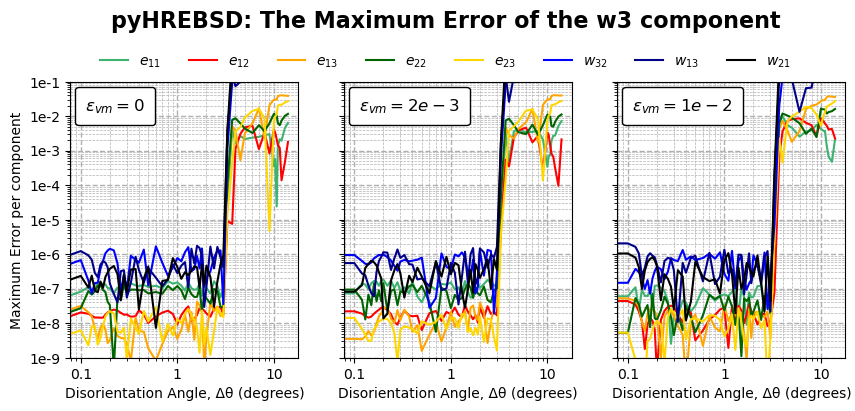

In [14]:

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'blue',
    'w13': 'darkblue',
    'w21': 'black',

}

# arrays for each component (must exist in the notebook scope)
array_abs = [e11_abs_error, e12_abs_error, e13_abs_error,
            e22_abs_error, e23_abs_error, 
            w32_abs_error, w13_abs_error, w21_abs_error]

rows = [0, 2, 4]   # the row indices plotted in your three subplots

for ax_idx, row in enumerate(rows):
    for comp_idx, comp in enumerate(components):
        y = array_abs[comp_idx][row, :]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle='-', label=labels[comp_idx], color=color_map[comp])
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle='-', color=color_map[comp])

    ax[ax_idx].set_ylim(1e-9, 1e-1)
    if strain:
        ax[ax_idx].set_xlabel("Strain Magnitude")
    else:
        ax[ax_idx].set_xlabel("Disorientation Angle, Δθ (degrees)")
    # titles for each subplot (match your previous titles)
    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Maximum Error per component")
        if strain:
            title = rf"$ \Delta \theta = 0 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 0$"
    elif ax_idx == 1:
        if strain:
            title = r"$ \Delta \theta = 0.346 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        if strain:
            title = r"$ \Delta \theta = 0.866 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 1e-2$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)

    if strain:
        ax[ax_idx].set_xticks([1e-4, 1e-3, 1e-2, 5e-2])
        ax[ax_idx].set_xticklabels([r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$5 \times 10^{-2}$'])
    else:
        ax[ax_idx].set_xticks([0.1, 1, 10])
        ax[ax_idx].set_xticklabels(['0.1', '1', '10'])
    ax[ax_idx].set_yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
    if ax_idx == 0:
        ax[ax_idx].set_yticklabels(['1e-9', '1e-8', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1'])
    # (y ticklabels already set/hidden above)

fig.suptitle(f"pyHREBSD: The Maximum Error of the {componentname} component", fontsize=16, fontweight='bold', y=0.98)

# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/MaxErrorpercomponent_altering_{componentname}.png', dpi=300)
plt.show()

# Error Spread 

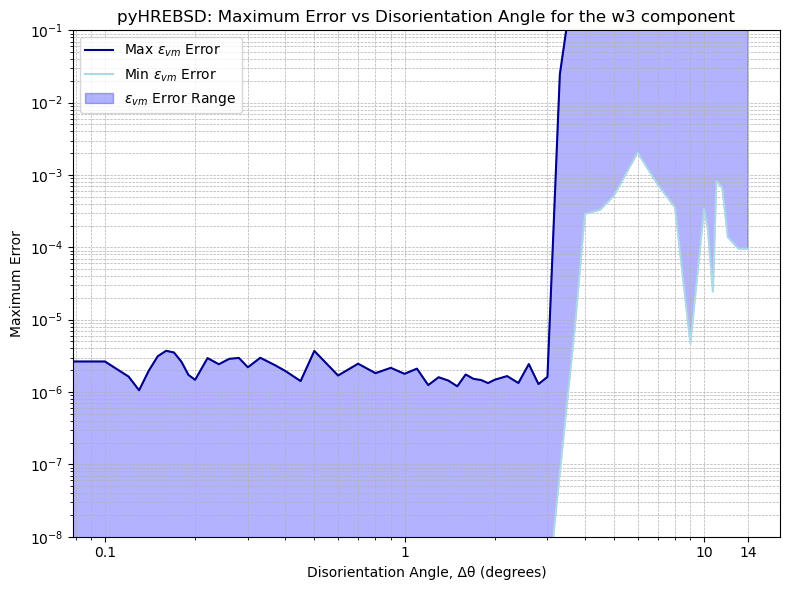

In [15]:
#plot min and max evm error against disorientation angle
plt.figure(figsize=(8,6))

if strain:
    plt.loglog(x_axis, max_of_max_absolute_errors, linestyle='-', label=rf'Max $\Delta \theta$ Error', color='darkblue')
    plt.loglog(x_axis, min_of_min_absolute_errors, linestyle='-', label=rf'Min $\Delta \theta$ Error', color='lightblue')
    plt.fill_between(x_axis, min_of_min_absolute_errors, max_of_max_absolute_errors, color='blue', alpha=0.3, label=rf'$\Delta \theta$ Error Range')
    plt.ylim(1e-8, 1e-1)
     
else:
    plt.loglog(x_axis, max_of_max_absolute_errors, linestyle='-', label='Max $ε_{vm}$ Error', color='darkblue')
    plt.loglog(x_axis, min_of_min_absolute_errors, linestyle='-', label='Min $ε_{vm}$ Error', color='lightblue')
    plt.fill_between(x_axis, min_of_min_absolute_errors, max_of_max_absolute_errors, color='blue', alpha=0.3, label='$ε_{vm}$ Error Range')
    plt.ylim(1e-8, 1e-1)

if strain:
    plt.xlabel('Strain Magnitude')
else:
    plt.xlabel("Disorientation Angle, Δθ (degrees)")
plt.ylabel("Maximum Error")

if strain:
    plt.title(f"pyHREBSD: Maximum Error vs Strain Magnitude for the {componentname} component")
else:
    plt.title(f"pyHREBSD: Maximum Error vs Disorientation Angle for the {componentname} component")
plt.legend()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)

if strain:
        plt.xticks([1e-4, 1e-3, 1e-2, 5e-2], [r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$5 \times 10^{-2}$'])
else:
    plt.xticks([0.1, 1, 10, 14], ['0.1', '1', '10', '14'])

plt.tight_layout()

#save the plot
plt.savefig(f'{foldername}/ErrorRange_for_{componentname}.png')

plt.show()

# Examining Homographies 

In [16]:
F_true = np.zeros((e_true.shape[0], 3, 3))
h_true = np.zeros((e_true.shape[0], 8))

for i in range(Rows*Columns):
    F_true[i] = ErnouldsMethod.determineF(e_true[i, :], w_true[i, :])
    h_true[i] = conversions.F2h_CDmod(F_true[i]/F_true[i, 2, 2], [0.0, 0.0, 800])



In [17]:
#save the h_true and h_calc arrays as .csv files
np.savetxt(f"{foldername}{componentname}_h_true.csv", h_true, delimiter=",")
np.savetxt(f"{foldername}{componentname}_h_calc.csv", h_calc, delimiter=",")

In [18]:
#calculate the absolute error in h matrices
h_abs_error = np.abs(np.abs(h_calc) - np.abs(h_true))

h11_abs_error = h_abs_error[:, 0].reshape(Rows, Columns)
h12_abs_error = h_abs_error[:, 1].reshape(Rows, Columns)
h13_abs_error = h_abs_error[:, 2].reshape(Rows, Columns)
h21_abs_error = h_abs_error[:, 3].reshape(Rows, Columns)
h22_abs_error = h_abs_error[:, 4].reshape(Rows, Columns)
h23_abs_error = h_abs_error[:, 5].reshape(Rows, Columns)
h31_abs_error = h_abs_error[:, 6].reshape(Rows, Columns)
h32_abs_error = h_abs_error[:, 7].reshape(Rows, Columns)

In [19]:
#print the first 5 rows of h32_abs_error
print(h32_abs_error[1, 0:5])


[6.30404727e-11 3.44880211e-11 1.48129892e-11 2.30601256e-11
 1.04081342e-11]


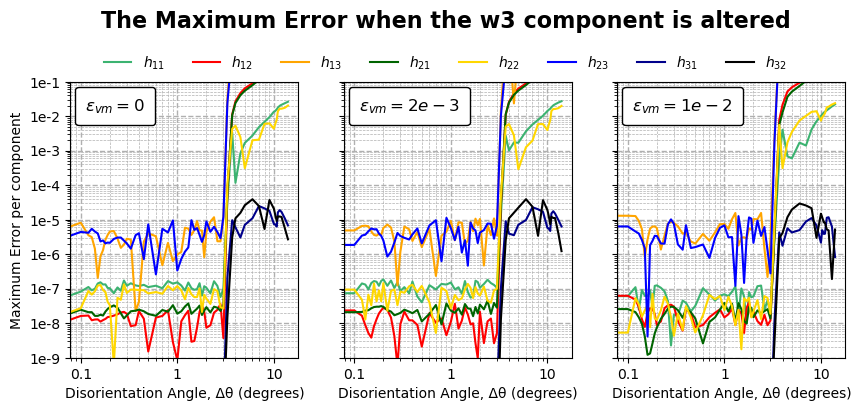

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['h11', 'h12', 'h13', 'h21', 'h22', 'h23', 'h31', 'h32']
labels = [r'$h_{11}$', r'$h_{12}$', r'$h_{13}$', r'$h_{21}$', r'$h_{22}$', r'$h_{23}$', r'$h_{31}$', r'$h_{32}$']
color_map = {
    'h11': 'mediumseagreen',
    'h12': 'red',
    'h13': 'orange',
    'h21': 'darkgreen',
    'h22': 'gold',
    'h23': 'blue',
    'h31': 'darkblue',
    'h32': 'black',
}

# arrays for each component (must exist in the notebook scope)
array_abs = [h11_abs_error, h12_abs_error, h13_abs_error,
            h21_abs_error, h22_abs_error, h23_abs_error, 
            h31_abs_error, h32_abs_error]
 

rows = [0, 2, 4]   # the row indices plotted in your three subplots

for ax_idx, row in enumerate(rows):
    for comp_idx, comp in enumerate(components):
        y = array_abs[comp_idx][row, :]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle='-', label=labels[comp_idx], color=color_map[comp])
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle='-', color=color_map[comp])

    ax[ax_idx].set_ylim(1e-9, 1e-1)
    if strain:
        ax[ax_idx].set_xlabel("Strain Magnitude")
    else:
        ax[ax_idx].set_xlabel("Disorientation Angle, Δθ (degrees)")
    # titles for each subplot (match your previous titles)
    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Maximum Error per component")
        if strain:
            title = rf"$ \Delta \theta = 0 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 0$"
    elif ax_idx == 1:
        if strain:
            title = r"$ \Delta \theta = 0.346 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        if strain:
            title = r"$ \Delta \theta = 0.866 \degree$"
        else:
            title = r"$\varepsilon_{vm} = 1e-2$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)

    if strain:
        ax[ax_idx].set_xticks([1e-4, 1e-3, 1e-2, 5e-2])
        ax[ax_idx].set_xticklabels([r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$5 \times 10^{-2}$'])
    else:
        ax[ax_idx].set_xticks([0.1, 1, 10])
        ax[ax_idx].set_xticklabels(['0.1', '1', '10'])
    ax[ax_idx].set_yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
    if ax_idx == 0:
        ax[ax_idx].set_yticklabels(['1e-9', '1e-8', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1'])
    # (y ticklabels already set/hidden above)

fig.suptitle(f"The Maximum Error when the {componentname} component is altered", fontsize=16, fontweight='bold', y=0.98)

# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/MaxError_homography_altering_{componentname}.png', dpi=300)
plt.show()

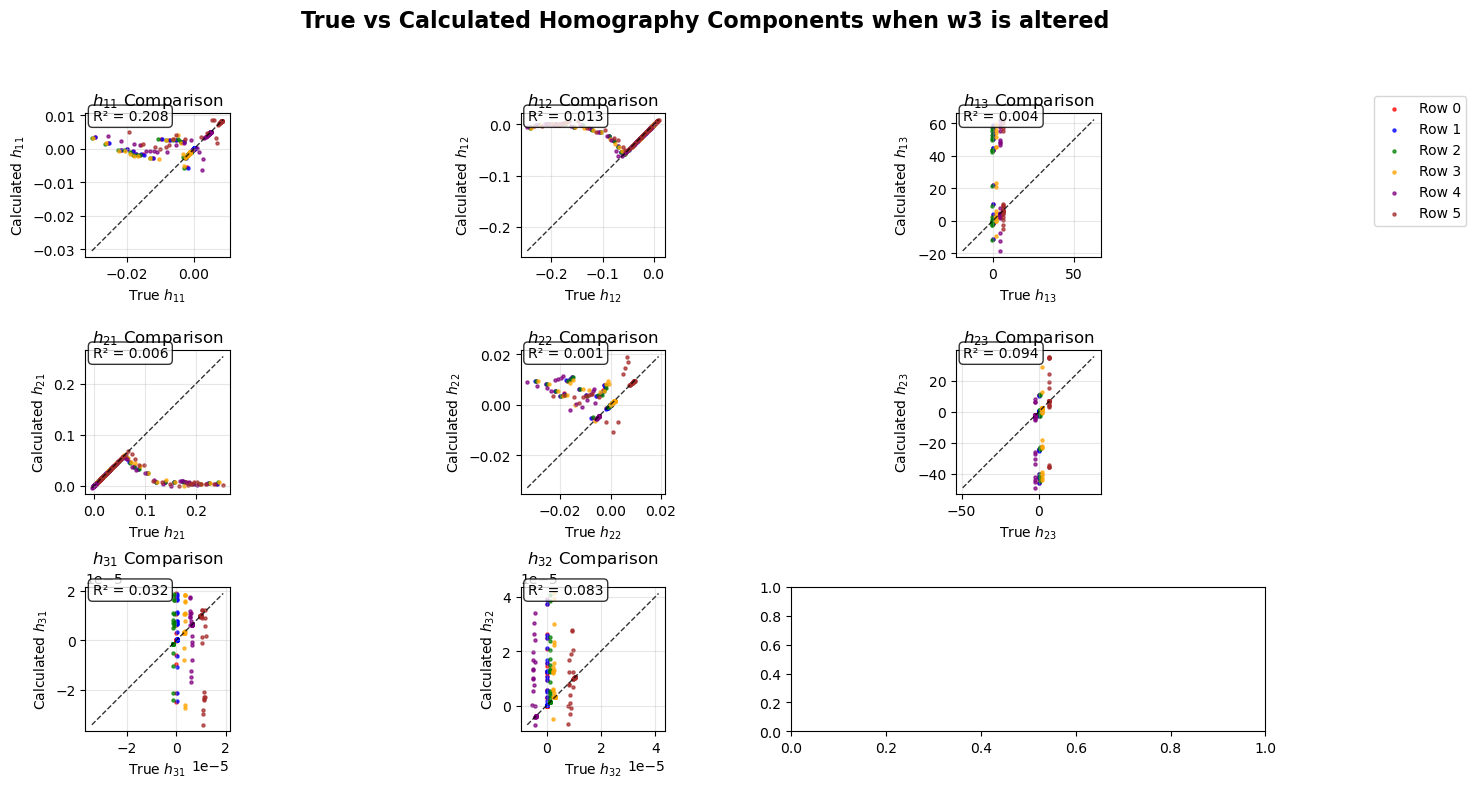

In [21]:
# Create subplots for all h components
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
axes = axes.flatten()  # Make it easier to iterate

# Define component names and labels
h_components = ['h11', 'h12', 'h13', 'h21', 'h22', 'h23', 'h31', 'h32']
h_labels = [r'$h_{11}$', r'$h_{12}$', r'$h_{13}$', r'$h_{21}$', r'$h_{22}$', r'$h_{23}$', r'$h_{31}$', r'$h_{32}$']

# Define colors for each row
row_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
row_labels = [f'Row {i}' for i in range(Rows)]

# Plot each component
for i, (comp, label) in enumerate(zip(h_components, h_labels)):
    # Plot each row with different colors
    for row in range(Rows):
        # Get data for this row
        start_idx = row * Columns
        end_idx = (row + 1) * Columns
        
        # Only show label on first subplot to avoid legend duplication
        label_text = row_labels[row] if i == 0 else None
        
        axes[i].scatter(h_true[start_idx:end_idx, i], h[start_idx:end_idx, i], 
                       color=row_colors[row], s=5, alpha=0.7, label=label_text)
    
    # Perfect correlation line (y = x)
    min_val = min(h_true[:, i].min(), h_calc[:, i].min())
    max_val = max(h_true[:, i].max(), h_calc[:, i].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, alpha=0.8)
    
    # Labels and formatting
    axes[i].set_xlabel(f'True {label}')
    axes[i].set_ylabel(f'Calculated {label}')
    axes[i].set_title(f'{label} Comparison')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_aspect('equal')
    
    # Add R² correlation coefficient
    correlation = np.corrcoef(h_true[:, i], h[:, i])[0, 1]
    r_squared = correlation**2
    axes[i].text(0.05, 0.95, f'R² = {r_squared:.3f}', 
                transform=axes[i].transAxes, fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Overall title
fig.suptitle(f'True vs Calculated Homography Components when {componentname} is altered', 
             fontsize=16, fontweight='bold', y=0.98)

# Add legend (only from first subplot to avoid duplicates)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.88))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)

# Save the figure
plt.savefig(f'{foldername}/True_vs_Calculated_all_h_components_{componentname}.png', dpi=300, bbox_inches='tight')
plt.show()

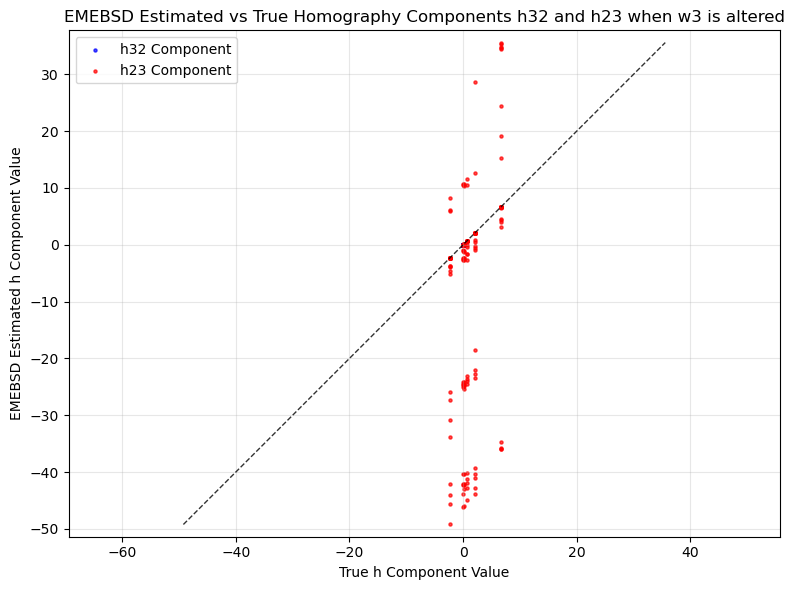

In [22]:
#zoom in on the h32 and h23 components of the h matrix
plt.figure(figsize=(8,6))
plt.scatter(h_true[:, 7], h_calc[:, 7], color='blue', s=5, alpha=0.7, label='h32 Component')
plt.scatter(h_true[:, 5], h_calc[:, 5], color='red', s=5, alpha=0.7, label='h23 Component')
#perfect correlation line
min_val = min(h_true[:, 7].min(), h_calc[:, 7].min(), h_true[:, 5].min(), h_calc[:, 5].min())
max_val = max(h_true[:, 7].max(), h_calc[:, 7].max(), h_true[:, 5].max(), h_calc[:, 5].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, alpha=0.8)
plt.xlabel('True h Component Value')
plt.ylabel('EMEBSD Estimated h Component Value')
plt.title(f'EMEBSD Estimated vs True Homography Components h32 and h23 when {componentname} is altered')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.tight_layout()
#save the plot
plt.savefig(f'{foldername}/EMEBSD_True_vs_Estimated_h32_h23_{componentname}.png', dpi=300)
plt.show()
